# Charge Reasoning I
## PH 212 COCC
### Bruce Emerson 6/6/2020

It is a basic tenant of physics teaching that one of the things which is often hard to learn is to reason quantitatively without numbers. This is often relevant when we know the relationship between the outcome and the characteristics of the problem that affect that outcome. In the case of charge we (hopefully) understand conceptually that changing the magnitude of either charge changes the amount of force they each experience and that the distance between the charges (or the centers of spherical distributions of charge) also affects the force. The force depends on the inverse of the square of the distance.

This notebook is an attempt to provide some direct practice with those concepts.

## Dependencies

This is my usual spectrum of dependencies that seem to be generally useful. We'll see if I need additional ones.

In [1]:
import numpy as np
import matplotlib as mplot
import matplotlib.pyplot as plt
from numpy.polynomial import polynomial as ply
from numpy.random import default_rng
rng = default_rng()

## Reference Point

Assume that $F_1$ is the force between two identical charges of magnitude Q = 2 a distance r = 4 apart (yellow charges). Run the cell below to generate two additional charges (shades of blue-gray) and plot them on the graph. 

The goal is the determine the ratio of the Coulomb force between the blue charges, $F_2$, and the Coulomb force between the yellow charges $F_1$. The ratio $= \frac{F_2}{F_1}$ is what you are seeking to determine.

To get the most out of this exercise run (shift-return) the next cell to generate a new proportional reasoning problem. The yellow charges will always be the same magnitude and distance apart but the blue charges will change. 


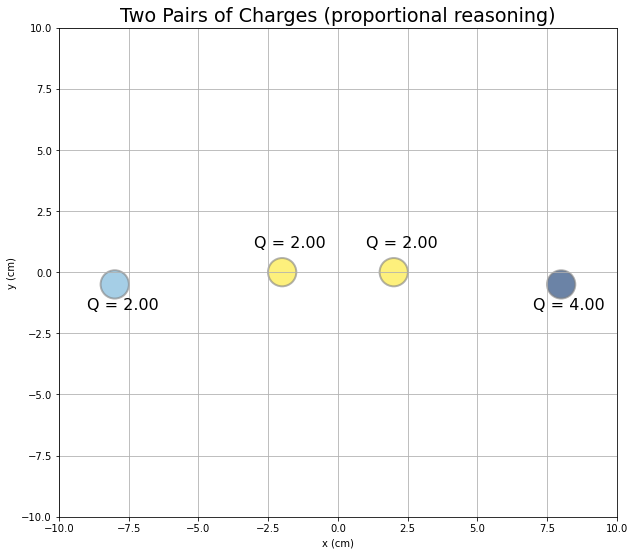

In [2]:
# Generate the problem
# Begin with the reference charges -- manually set in the begining
# reference charge locations
xchargeref1 = 2.
xchargeref2 = -2.
ychargeref1 = 0.
ychargeref2 = 0.
rseparationref = np.sqrt((xchargeref1-xchargeref2)**2 + (ychargeref1 - ychargeref2)**2)

# 'size of reference charged object'
Rsphere1 = 4.
Rsphere2 = 4.
Rscale = 200.  # potential scaling value for plot

# charge on reference objects in arbitrary units
Qcharge1 = 2.0
Qcharge2 = 2.0
Qscale = .5   # potential scaling value for plot

# Create the other pair of charges to compare to the reference above
# randomly generate challenge charges

xchallenge1 = -rng.integers(10) # generate an integer between 0 and 9
xchallenge2 = rng.integers(10) # generate an integer between 0 and 9
ychallenge1 = -0.5 # rng.integers(10) # generate an integer between 0 and 9
ychallenge2 = -0.5 # rng.integers(10) # generate an integer between 0 and 9
rchallenge = np.sqrt((xchallenge1-xchallenge2)**2 + (ychallenge1 - ychallenge2)**2)
# print("Challenge Locations ",xchallenge1,xchallenge2,ychallenge1,ychallenge2)

# generate challenge charges
Qchallenge1 = rng.integers(10) + 1 # generate an integer between 1 and 10
Qchallenge2 = rng.integers(10) + 1  # generate an integer between 1 and 10

# print("Challenge Charges ",Qchallenge1,Qchallenge2)

# 'size of reference charged object'
Rspherechal1 = 4.
Rspherechal2 = 4.
Rscalechallenge = 200.  # potential scaling value for plot

refForce = Qcharge1*Qcharge2/(rseparationref**2)
challengeForce = Qchallenge1*Qchallenge2/(rchallenge**2)
ratio = challengeForce/refForce
# print("F1 ",refForce)
# print("challengeForce ",challengeForce)
# print("ratio ",ratio)

# create data for reference plot -- first element is always 0,0 with 0 charge and size
# the first element helps the color mapping behave more nicely
xr = [0.,xchargeref1, xchargeref2]
yr = [0.,ychargeref1,ychargeref2]
zr = [0.,Rsphere1*Rscale,Rsphere2*Rscale]

mr = [0.,Qcharge1,Qcharge2]
#zrscale
# create data for challenge plot -- first element is always 0,0 with 0 charge and size
xc = [0.,xchallenge1,xchallenge2]
yc = [0.,ychallenge1,ychallenge2]
zc = [0.,Rspherechal1*Rscalechallenge,Rspherechal2*Rscalechallenge]
mc = [0.,Qchallenge1,Qchallenge2]

# Let the plotting begin!!
fig2, ax2 = plt.subplots()

# Change color with c and alpha. I map the color to the charge value with m axis value.
ax2.scatter(xr, yr, s=zr, c=mr, cmap='viridis', 
            alpha=0.6, edgecolors="grey", linewidth=2, label = "reference")
ax2.scatter(xc, yc, s=zc, c=mc, cmap='Blues', 
            alpha=0.6, edgecolors="grey", linewidth=2, label = "challenge")

# organize limits
xall = np.concatenate((xr,xc)) # collect all of the x values
yall = np.concatenate((yr,yc)) # collect all of the y values
xmax = np.max(xall)
xmin = np.min(xall)
ymax = np.max(yall)
ymin = np.min(yall)
# generate some plot space around the limits
xlimH = xmax +rseparationref/2.
xlimL = xmin-rseparationref/2.
ylimH = ymax +rseparationref/2.
ylimL = ymin-rseparationref/2.
plt.ylim(xlimL, xlimH)
plt.xlim(xlimL, xlimH)


# Add titles (main and on axis)
plt.rcParams.update({'font.size': 16}) # make labels easier to read
ax2.set(xlabel='x (cm)', ylabel='y (cm)',
       title='Two Pairs of Charges (proportional reasoning)')
# label the charges
offset = 1.
labelref1 = ("Q = %.2f" % Qcharge1)
labelref2 = ("Q = %.2f" % Qcharge2)
labelchal1 = ("Q = %.2f" % Qchallenge1)
labelchal2 = ("Q = %.2f" % Qchallenge2)
ax2.text(xchargeref1-offset, ychargeref1 + offset, labelref1)
ax2.text(xchargeref2-offset, ychargeref2 + offset, labelref2)
ax2.text(xchallenge1-offset, ychallenge1 - offset, labelchal1)
ax2.text(xchallenge2-offset, ychallenge2 - offset, labelchal2)

fig2.set_size_inches(10, 9)
# ax2.legend(loc= 2)
ax2.grid()
plt.show()

#fig2.savefig('chargereasonI.png')

## To Check Your Answer!

Execute the code cell below to check your answer. When you execute the cell it will give you a blank to enter the ratio $\frac{F_2}{F_1}$ with a couple of decimal places. Here are the possible responses from the check of your answer:

1. Nailed it! -- your answer is within 1% of the calculated answer.
1. Within 5% -- pretty close and probably just round off error.
1. Within 20% -- seems likely that there is a math error
1. Need to run the numbers again -- your answer is off by more than 20% 

To try again rerun the code cell below (shift-return) and enter your new attempt. 

If you rerun the plot cell before this one you will generate a new problem with new answers.



In [18]:
#### get student result
print("Enter the ratio of the new force relative to F1 - the reference force.")
print("Your result should be entered with 2 decimal places.")
studentresult = float(input("Enter your result: "))

# check result relative to answer
closeness = np.absolute(1.0 - (studentresult/ratio))
if closeness < 0.01:
    print("Yay, you nailed it!")
else:
    if closeness < 0.05:
        print("You are within 5% which could just be rounding errors. ")
    else:
        if closeness < 0.2:
            print("You are within 20% which feels like you're doing it right. Check numbers. ")
        else:
            print("Probably need to run the numbers again or generate a new problem. ")
    
print("Practice makes perfect")


Enter the ratio of the new force relative to F1 - the reference force.
Your result should be entered with 2 decimal places.


Enter your result:  1.58


Yay, you nailed it!
Practice makes perfect


## Practice!!

Rinse and repeat until you get it right a couple of times in a row.